<a href="https://colab.research.google.com/github/Francisss3/AAI614_Francis-/blob/main/Notebook7_2_accel_data_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAI614: Data Science & its Applications

*Notebook 7.2: Accelerating Data Science*

<a href="https://colab.research.google.com/github/harmanani/AAI614/blob/main/Week%207/Notebook7.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: Data Science with Python and Dask

### Examining the Metadata of Dask Objects

You would need for this lab to downlaod the data and store on your local disk as it is arond 2GB with 42.3M Rows of Parking Ticket Data.  The data can be downloaded from [Kaggle](http://www.kaggle.com/new-york-city/nyc-parking-tickets/)

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("new-york-city/nyc-parking-tickets")

print("Path to dataset files:", path)

100%|██████████| 2.02G/2.02G [00:17<00:00, 122MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/new-york-city/nyc-parking-tickets/versions/2


In [3]:
!pip install dask[dataframe]
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from matplotlib import pyplot as plt

df = dd.read_csv('/root/.cache/kagglehub/datasets/new-york-city/nyc-parking-tickets/versions/2/*2017.csv')
df.head()



INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 5.8 MB/s eta 0:00:00


ValueError: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+---------------------+--------+----------+
| Column              | Found  | Expected |
+---------------------+--------+----------+
| House Number        | object | float64  |
| Time First Observed | object | float64  |
+---------------------+--------+----------+

The following columns also raised exceptions on conversion:

- House Number
  ValueError("could not convert string to float: '150-34'")
- Time First Observed
  ValueError("could not convert string to float: '1138A'")

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'House Number': 'object',
       'Time First Observed': 'object'}

to the call to `read_csv`/`read_table`.

In [4]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from matplotlib import pyplot as plt

df = dd.read_csv(
    '/root/.cache/kagglehub/datasets/new-york-city/nyc-parking-tickets/versions/2/*2017.csv',
    dtype={
        'House Number': 'object',
        'Time First Observed': 'object'
    }
)

df.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,5092469481,GZH7067,NY,PAS,07/10/2016,7,SUBN,TOYOT,V,0,...,GY,NaN,2001,<NA>,0,<NA>,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN
1,5092451658,GZH7067,NY,PAS,07/08/2016,7,SUBN,TOYOT,V,0,...,GY,NaN,2001,<NA>,0,<NA>,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN
2,4006265037,FZX9232,NY,PAS,08/23/2016,5,SUBN,FORD,V,0,...,BK,NaN,2004,<NA>,0,<NA>,BUS LANE VIOLATION,NaN,NaN,NaN
3,8478629828,66623ME,NY,COM,06/14/2017,47,REFG,MITSU,T,10610,...,WH,NaN,2007,<NA>,0,04,47-Double PKG-Midtown,NaN,NaN,NaN
4,7868300310,37033JV,NY,COM,11/21/2016,69,DELV,INTER,T,10510,...,WHITE,NaN,2007,<NA>,0,31 6,69-Failure to Disp Muni Recpt,NaN,NaN,NaN


In [5]:
missing_values = df.isnull().sum()
missing_values

Dask Series Structure:
npartitions=1
Date First Observed    int64
Violation Time           ...
dtype: int64
Dask Name: to_pyarrow_string, 6 graph layers

In [6]:
missing_count = ((missing_values / df.index.size) * 100)
missing_count

Dask Series Structure:
npartitions=1
Date First Observed    float64
Violation Time             ...
dtype: float64
Dask Name: mul, 11 graph layers

### Running Computations with the Compute Method

In [7]:
with ProgressBar():
    missing_count_pct = missing_count.compute()
missing_count_pct

[###########                             ] | 28% Completed | 25.32 s

/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (18,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


[########################################] | 100% Completed | 67.57 s


,0
Summons Number,0.000000
Plate ID,0.006739
Registration State,0.000000
Plate Type,0.000000
Issue Date,0.000000
Violation Code,0.000000
Vehicle Body Type,0.395361
Vehicle Make,0.676199
Issuing Agency,0.000000
Street Code1,0.000000


In [8]:
columns_to_drop = missing_count_pct[missing_count_pct > 60].index
with ProgressBar():
    df_dropped = df.drop(columns_to_drop, axis=1).persist()

[#######                                 ] | 18% Completed | 23.12 s

/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (18,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


[########################################] | 100% Completed | 66.24 s


### Visualizing a Simple DAG using Dask Delayed Objects

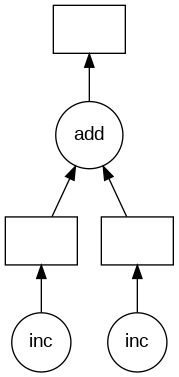

In [9]:
import dask.delayed as delayed
from dask.diagnostics import ProgressBar

def inc(i):
    return i + 1

def add(x, y):
    return x + y

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

z.visualize()

### Visualizing More Complex DAGs with Loops and Collections

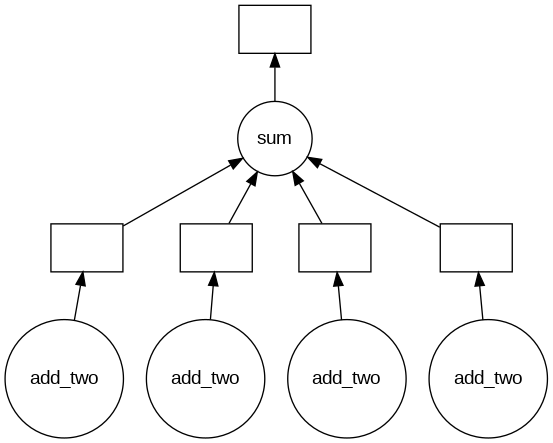

In [10]:
# Listing 2.7
def add_two(x):
    return x + 2

def sum_two_numbers(x,y):
    return x + y

def multiply_four(x):
    return x * 4

data = [1, 5, 8, 10]

step1 = [delayed(add_two)(i) for i in data]
total = delayed(sum)(step1)
total.visualize()

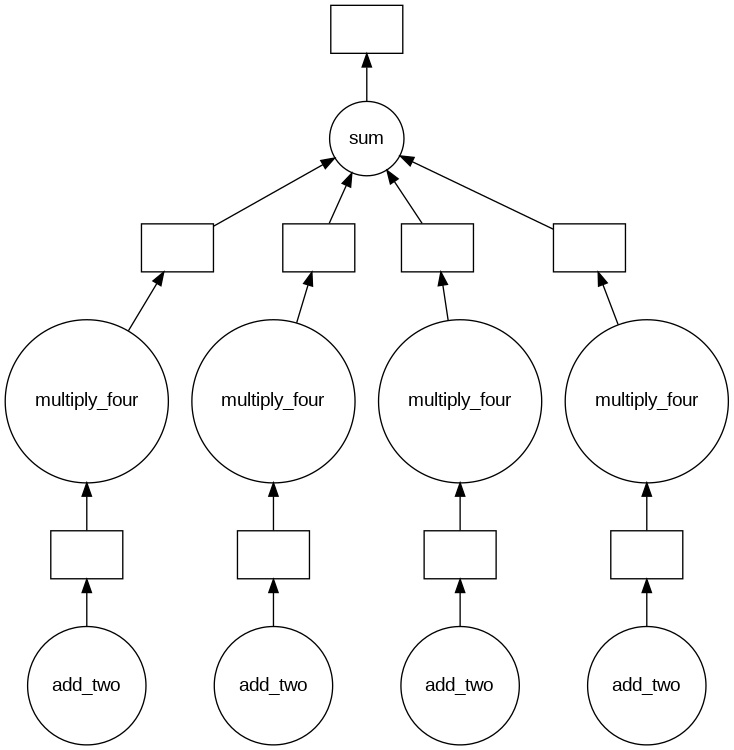

In [11]:
def add_two(x):
    return x + 2

def sum_two_numbers(x,y):
    return x + y

def multiply_four(x):
    return x * 4

data = [1, 5, 8, 10]

step1 = [delayed(add_two)(i) for i in data]
step2 = [delayed(multiply_four)(j) for j in step1]
total = delayed(sum)(step2)
total.visualize()

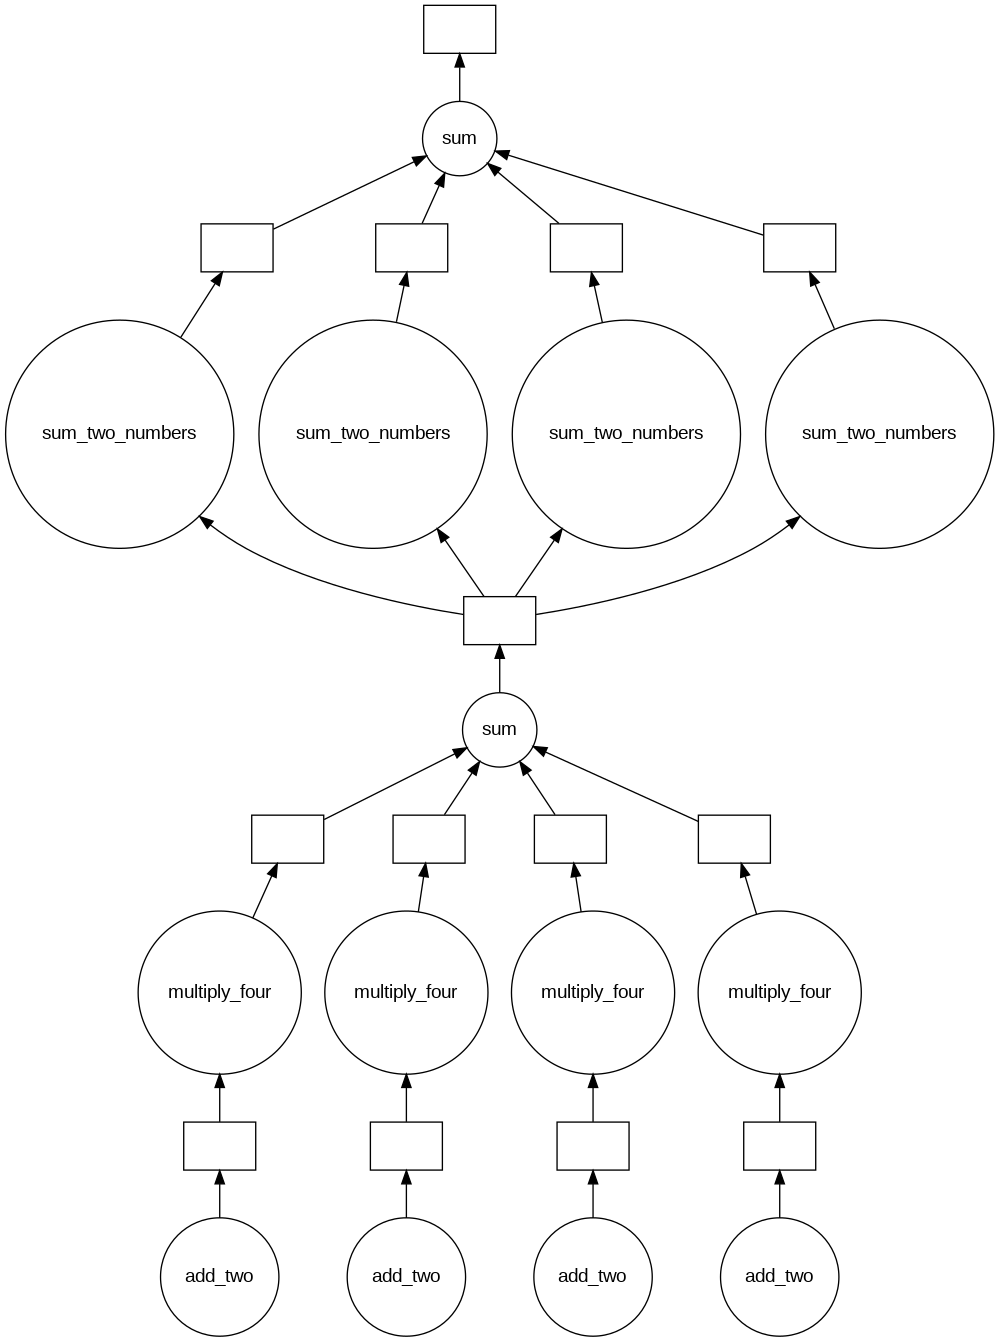

In [12]:
data2 = [delayed(sum_two_numbers)(k, total) for k in data]
total2 = delayed(sum)(data2)
total2.visualize()

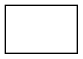

In [13]:
total_persisted = total.persist()
total_persisted.visualize()

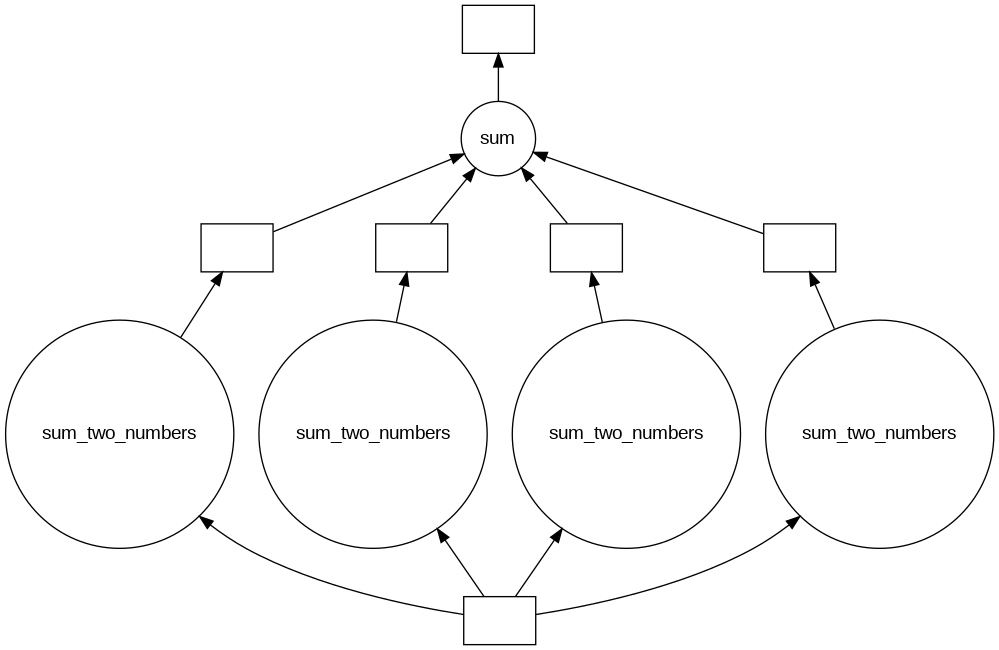

In [14]:
data2 = [delayed(sum_two_numbers)(l, total_persisted) for l in data]
total2 = delayed(sum)(data2)
total2.visualize()

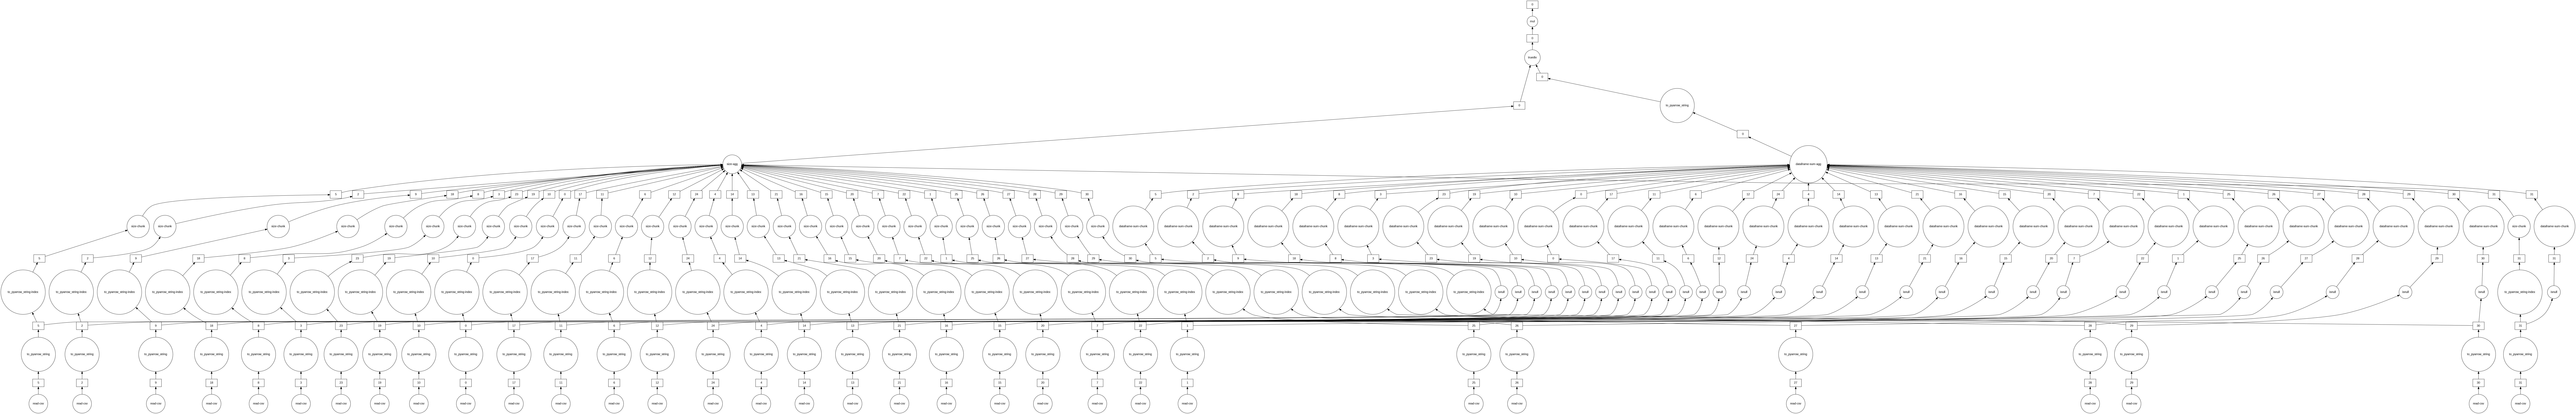

In [15]:
missing_count.visualize()